In [1]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached numpy-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached scipy-1.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached fonttools-4.56.0-cp3

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Import des bibliothèques nécessaires
import pandas as pd


# Lire le fichier train.csv et test.csv
df = pd.read_csv("train.csv")
file2 = pd.read_csv("test.csv")

# Afficher les premières lignes du dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Compter les valeurs manquantes dans chaque colonne
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
file2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Importation des bibliothèques nécessaires pour l'encodage
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Vérification si les colonnes 'Sex' et 'Embarked' existent dans le DataFrame
if 'Sex' in df.columns and 'Embarked' in df.columns:
    
    # **1. Label Encoding pour la colonne "Sex"**
    # Le LabelEncoder transforme les catégories en valeurs numériques (ex : 'male' -> 1, 'female' -> 0).
    # Cela est utile pour les modèles qui ne peuvent pas traiter des données catégorielles directement.
    label_encoder = LabelEncoder()
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])  # Création d'une nouvelle colonne encodée pour "Sex"

    # **2. One-Hot Encoding pour la colonne "Embarked"**
    # Le OneHotEncoder transforme chaque valeur de la colonne en une nouvelle colonne binaire (0 ou 1) pour chaque catégorie.
    # Par exemple, la colonne "Embarked" avec les valeurs ['C', 'Q', 'S'] sera transformée en 3 nouvelles colonnes.
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']])  # Appliquer One-Hot Encoding sur la colonne "Embarked"

    # Convertir le tableau numpy résultant en DataFrame pour avoir des noms de colonnes clairs et compréhensibles
    # `get_feature_names_out()` génère les noms des colonnes à partir des catégories présentes dans "Embarked" (C, Q, S)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

    # Ajouter les nouvelles colonnes encodées au DataFrame existant
    # Cette étape permet d'ajouter les colonnes binaires créées par One-Hot Encoding au DataFrame original
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    # Supprimer les colonnes originales "Sex" et "Embarked" si elles ne sont plus nécessaires
    # Cela permet de ne conserver que les versions encodées des colonnes
    df.drop(columns=['Sex', 'Embarked'], inplace=True)

    # Afficher les premières lignes du DataFrame après l'encodage
    print("\nAprès encodage :")
    print(df.head())  # Vérifier les résultats

else:
    # Si l'une ou les deux colonnes 'Sex' ou 'Embarked' ne sont pas présentes, afficher un message d'erreur
    print("Erreur : Les colonnes 'Sex' et/ou 'Embarked' ne sont pas présentes dans le fichier CSV.")



Après encodage :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_Encoded  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN            1         0.0         0.0   
1          PC 17599  71.2833   C85            0         1.0         0.0   
2  STON/O2. 3101282   7.9250   NaN            0         0.0         0.0   
3       

In [6]:
# Vérifier les colonnes du DataFrame
print("Colonnes du DataFrame :", df.columns)

# Vérifier les valeurs manquantes avant imputation
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Imputation des colonnes numériques
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Remplace NaN par la médiane

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Remplace NaN par la moyenne

# Vérifier si les colonnes encodées d'Embarked existent
if all(col in df.columns for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']):
    print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].head())
    df.drop(columns=['Embarked_nan'], inplace=True)

# Imputation de la colonne 'Cabin'
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Remplace NaN par "Unknown"

# Vérifier les valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Colonnes du DataFrame : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

Valeurs manquantes avant imputation :
PassengerId       0
Survived          0
Pclass            0
Name              0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_Encoded       0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64
   Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0         0.0         0.0         1.0           0.0
1         1.0         0.0         0.0           0.0
2         0.0         0.0         1.0           0.0
3         0.0         0.0         1.0           0.0
4         0.0         0.0         1.0           0.0

Valeurs manquantes après imputation :
PassengerId    0
Survived       0
Pclass         0
Name    

In [7]:
scaler = StandardScaler()  # Centrage-réduction (moyenne=0, variance=1)

# Liste des variables numériques à transformer
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Appliquer le scaler sur les colonnes sélectionnées
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Vérification après transformation
print(df[numerical_features].describe())  # Vérifier les nouvelles valeurs

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [8]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

       PassengerId    Survived      Pclass           Age         SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  8.910000e+02   
mean    446.000000    0.383838    2.308642  2.272780e-16  4.386066e-17   
std     257.353842    0.486592    0.836071  1.000562e+00  1.000562e+00   
min       1.000000    0.000000    1.000000 -2.224156e+00 -4.745452e-01   
25%     223.500000    0.000000    2.000000 -5.657365e-01 -4.745452e-01   
50%     446.000000    0.000000    3.000000 -1.046374e-01 -4.745452e-01   
75%     668.500000    1.000000    3.000000  4.333115e-01  4.327934e-01   
max     891.000000    1.000000    3.000000  3.891554e+00  6.784163e+00   

              Parch          Fare  Sex_Encoded  Embarked_C  Embarked_Q  \
count  8.910000e+02  8.910000e+02   891.000000  891.000000  891.000000   
mean   5.382900e-17  3.987333e-18     0.647587    0.188552    0.086420   
std    1.000562e+00  1.000562e+00     0.477990    0.391372    0.281141   
min   -4.736736e-01 -6.484217e-01    

<Figure size 1200x800 with 0 Axes>

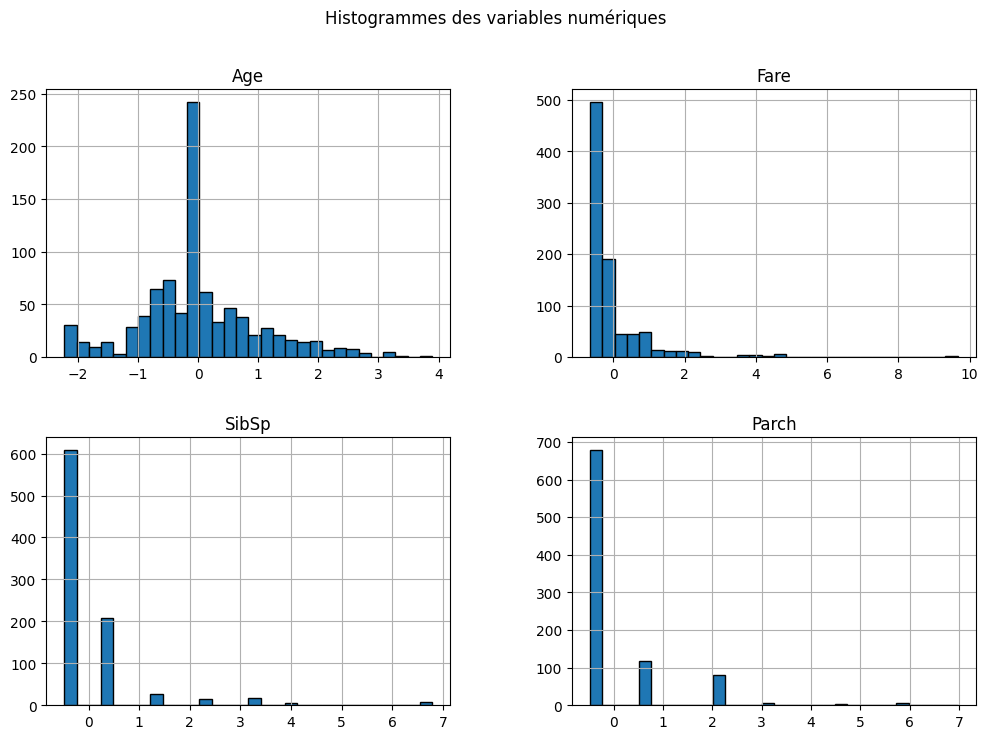

In [10]:
# Histogrammes pour toutes les variables numériques
plt.figure(figsize=(12, 8))
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables numériques')
plt.show()


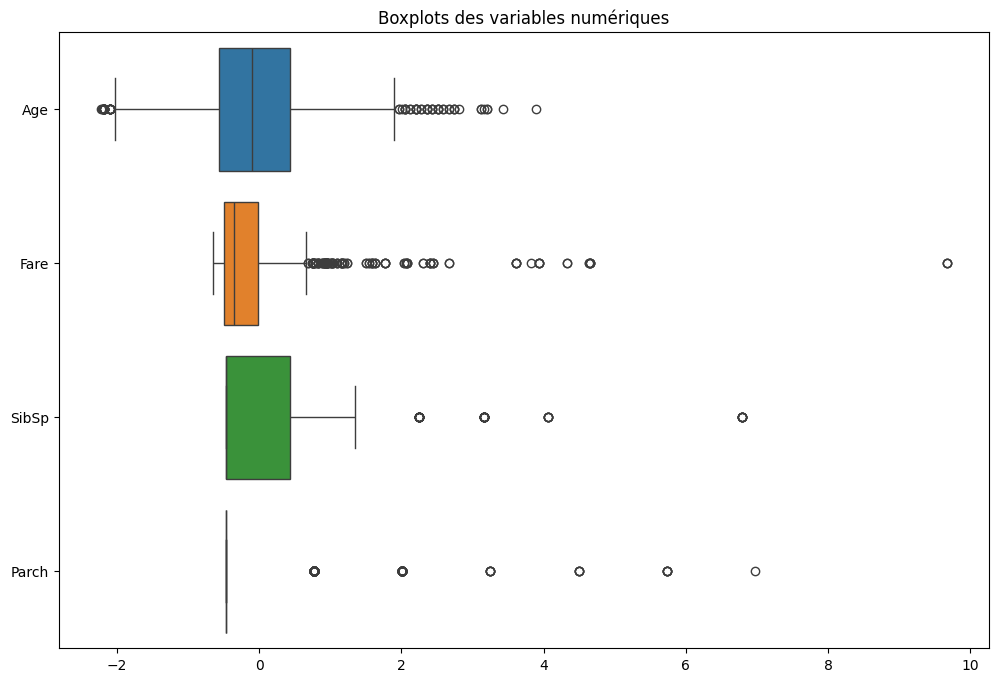

In [11]:
# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


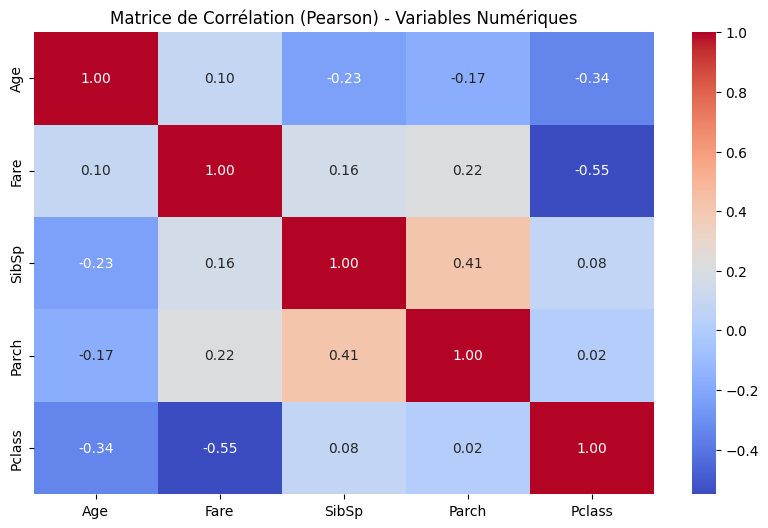

In [17]:
# Sélection des variables numériques
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]  # Pclass est ordinal, on peut le considérer ici aussi

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()



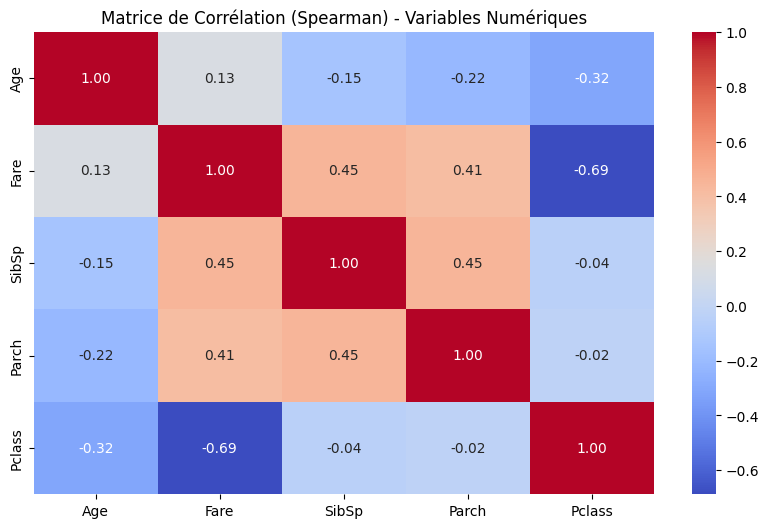

In [18]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

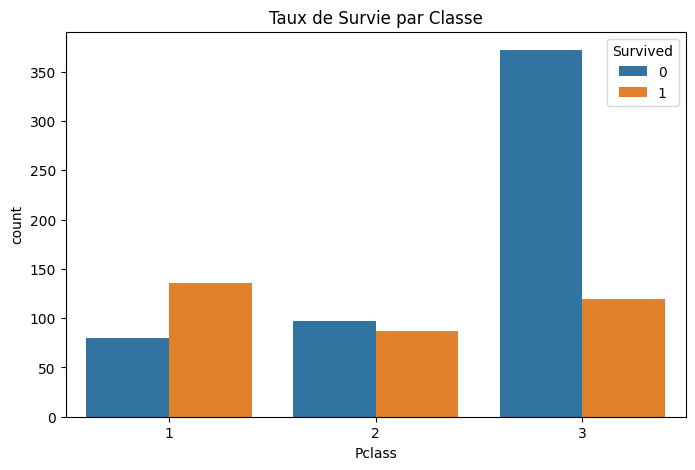

ValueError: Could not interpret value `Sex` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [19]:
# Countplot pour voir la répartition des survivants selon la classe
plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Taux de Survie par Classe")
plt.show()

# Countplot pour voir la répartition des survivants selon le sexe
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Taux de Survie par Sexe")
plt.show()

# Countplot pour voir la répartition des survivants selon le port d'embarquement
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement")
plt.show()
